## Plot nicely: make widget plot and animation of a series of snapshots
### Updated by Matan 2024 05 24


## How to work with the notebook?
### SPall is the data loaded (following a simulation).
### X is the data to present (chosesn through framesToShow series).
#### There is a handful of different plotting functions oriented for mixed population (active/passive and of different size)


In [4]:
import numpy as np
from os import listdir
from os.path import isfile, join

import pdb
from IPython.core.debugger import Tracer
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
#import pandas as pd
#from pandas import DataFrame, Series  # for convenience
#import pims
import time
import matplotlib as mpl

import pickle
import pandas as pd
import trackpy as tp

import ecoSystem as es


import ipywidgets as widgets
from IPython.display import display



def l2n(x): return np.array(x);
def n2l(x): return list(x)

mpl.rcParams['text.usetex'] = True

plt.style.use('default')
#plt.style.use('default')


plt.rcParams['figure.figsize'] = (6,6)

alignerColor = '#1f77b4';
fronterColor = '#2ca02c';
passiveColor = '#ff0000'#'#ff00ff'

In [22]:
pwd

'/Users/matan/Documents/research/cooperativeTransport/simulations/20230807ballisticVSdiffusive1000bots2'

In [5]:
def loadMultipleFiles(params,N,T,folderName):
    onlyfiles = [f for f in listdir(folderName) if isfile(join(folderName, f))]
    onlyfiles.sort()
    Nfiles = len(onlyfiles)

    SPall = np.zeros((T*Nfiles,params,N))

    for i in range(Nfiles):
        fileName = onlyfiles[i]
        SPall[T*i:T*(i+1):,:] = pickle.load(open(folderName+'/'+fileName,"rb"))
        
    return SPall

In [6]:
# Here X is referred to as a global var that contains the frames of interest from SPall
#This is a way of generating a movie within Jupyter notebook, you can view and then decide if to export
def updateHalfActiveHalfPassive_plot(time):
    fig,ax = plt.subplots(1,figsize = (10,10))
    ax.clear()
    ax.scatter(X[time,eco.xC,:Nmid],X[time,eco.yC,:Nmid],c='r', alpha = 0.4)
    ax.scatter(X[time,eco.xC,Nmid:],X[time,eco.yC,Nmid:],c='c', alpha = 0.4)
    ax.quiver(X[time,eco.xC,:Nmid],X[time,eco.yC,:Nmid],X[time,eco.nxC,:Nmid],X[time,eco.nyC,:Nmid],alpha=0.5,scale=40,color='w');

#    plt.axis([-xMax,xMax,-yMax,yMax])1
    plt.axis([-4,4,-4,4])
    plt.show()
    
#This is a way of generating a movie within Jupyter notebook, you can view and then decide if to export
def updatePlotAllPassive(time):
    fig,ax = plt.subplots(1,figsize = (10,10))
    ax.clear()
    ax.scatter(X[time,eco.xC,:],X[time,eco.yC,:],c='c', alpha = 0.4)
    plt.axis([-4,4,-4,4])
    plt.show()
    
#This is a way of generating a movie within Jupyter notebook, you can view and then decide if to export
def updatePlotAllActive(time):
    fig,ax = plt.subplots(1,figsize = (10,10))
    ax.clear()
    ax.scatter(X[time,eco.xC,:],X[time,eco.yC,:],c='r', alpha = 0.4)

    ax.quiver(X[time,eco.xC,:],X[time,eco.yC,:],X[time,eco.nxC,:],X[time,eco.nyC,:],alpha=0.5,scale=40,color='w');

    #ax.axis([-xMax,xMax,-yMax,yMax])
    ax.axis([-4,4,-4,4])
    plt.show()
    
#This is a way of generating a movie within Jupyter notebook, you can view and then decide if to export
def updatePlotAllActiveColorByTheta(time):
    fig,ax = plt.subplots(1,figsize = (10,10))
    ax.clear()
    theta = np.arctan2 (X[time,eco.nyC,:],X[time,eco.nxC,:]);
    colors = theta
    ax.scatter(X[time,eco.xC,:],X[time,eco.yC,:],c=colors, cmap=mpl.cm.get_cmap('hsv',10),alpha = 0.8)
    #ax.quiver(SPall[time,eco.xC,:],SPall[time,eco.yC,:],SPall[time,eco.nxC,:],SPall[time,eco.nyC,:],alpha=0.5,scale=40,color='w');
#    theta = np.arange(20)/20*2*np.pi-np.pi
#    colors = theta#

#    axL = plt.axes((0.7,0.7,0.1,0.1), polar=True)
#    c = axL.scatter(theta, np.ones(20), c=colors, cmap=mpl.cm.get_cmap('hsv',10), alpha=0.75)
    makePolarColorMap(fig,cmap='hsv')
#    ax.set_rorigin(-2.5)
 #   ax.set_theta_zero_location('W', offset=10)
    #ax.axis([-xMax,xMax,-yMax,yMax])
    #ax.axis([-10,10,-10,10])
    ax.axis([-4,4,-4,4])
    plt.show()
    
def makePolarColorMap(fig, cmap='hsv'):
    display_axes = fig.add_axes([0.75,0.75,0.1,0.1], projection='polar')
    #display_axes._direction = 2*np.pi ## This is a nasty hack - using the hidden field to 
                                  ## multiply the values such that 1 become 2*pi
                                  ## this field is supposed to take values 1 or -1 only!!

    norm = mpl.colors.Normalize(-np.pi, np.pi)

    quant_steps = 2056
    cb = mpl.colorbar.ColorbarBase(display_axes, cmap=mpl.cm.get_cmap(cmap,quant_steps), norm=norm, orientation='horizontal')

    # aesthetics - get rid of border and axis labels                                   
    cb.outline.set_visible(False)                                 
    display_axes.set_axis_off()
    
    
#This is a way of generating a movie within Jupyter notebook, you can view and then decide if to export
def updatePlotHeterogeneousBySize(time):
    fig,ax = plt.subplots(1,figsize = (10,10))
    ax.clear()

    active = X[time,eco.v0C,:]!=0
    passive = X[time,eco.v0C,:]==0
    th = traceHistory; #trace history (how man frames back to draw)
    #ax.axis([-xMax,xMax,-yMax,yMax])
    #ax.axis([-4,4,-4,4])
    
    ax.axis(axisWindow)
    
    activeColor = fronterColor;
    
    ax.plot(X[max(0,time-th):time,eco.xC,active], X[max(0,time-th):time,eco.yC,active],'-',color=activeColor,alpha=0.5,linewidth=3)
    ax.plot(X[max(0,time-th):time,eco.xC,passive], X[max(0,time-th):time,eco.yC,passive],'-',color=passiveColor,alpha=0.5,linewidth=3)
    ax.quiver(X[time,eco.xC,active],X[time,eco.yC,active],X[time,eco.nxC,active],X[time,eco.nyC,active],
              alpha=0.8,scale=40,color='w',pivot='mid');
    
    for i in range(N):
        xy = (X[time,eco.xC,i],X[time,eco.yC,i]);
        width = X[time,eco.rStericC,i]*2; #make the size of elipse the rSteric of particle
        
        linewidth = 0;
        
        facecolor = 'none'
        edgecolor = passiveColor;
        
        if X[time,eco.v0C,i] ==0:  #passive
            facecolor = passiveColor
            edgecolor = 'none';
            linewidth = 0.5;
            width = width;
            
        
        if X[time,eco.v0C,i] !=0:  #active
            if X[time,eco.wAC,i]<0:
                facecolor = fronterColor
            elif X[time,eco.wAC,i]>0:
                facecolor = alignerColor
            linewidth=0;
            width = width
         
        height = width
        elip = mpl.patches.Ellipse(xy,width,height,angle=0,facecolor = facecolor,edgecolor=edgecolor,linewidth = linewidth)#,alpha=0.7)#,color = markerColor)
        ax.add_patch(elip)


def updateAnimationHeterogeneousBySize(time):

    ax.cla()
    active = X[time,eco.v0C,:]!=0
    passive = X[time,eco.v0C,:]==0

    ax.axis(axisWindow)
    ax.axis('off')
    
    minTime = max(0,time-trailLength);
    
    for i in range(N):                
        
        xy = (X[time,eco.xC,i],X[time,eco.yC,i]);
        width = X[time,eco.rStericC,i]*2; #make the size of elipse the rSteric of particle
        
        linewidth = 0;
        
        facecolor = 'none'
        edgecolor = passiveColor;

        if X[time,eco.v0C,i] ==0:  #passive
            facecolor = passiveColor;
            edgecolor = passiveColor;
            linewidth = 0;
            width = width;
        
        if X[time,eco.v0C,i] !=0:  #active
            if X[time,eco.wAC,i]<0:
                facecolor = fronterColor
            elif X[time,eco.wAC,i]>0:
                facecolor = alignerColor
            linewidth=0;
            width = width
         
        height = width
        elip = mpl.patches.Ellipse(xy,width,height,angle=0,facecolor = facecolor,edgecolor=edgecolor,linewidth = linewidth)#,alpha=0.7)#,color = markerColor)
        ax.add_patch(elip)

#### Initialze parameters (number of particles, number of time steps etc number of parameters)

# Load Simulation Data

In [15]:
N = 1000;
T = 1000; #Time steps in each file
params=8;
boxSize = 10

eco = es.ecoSystem(N=N,params=params);

#Fronters:
#folderName = 'results/20230807121615results_grInteractingHeteroPopPeriodic_dt5e-05_N1e+03_T1e+06_kT5e+00_rSteric5.0e-02_rPassive1.0e+00_wS1e+02_V3e+01_wA-4e+00_box1e+01'

#Aligners:
folderName = 'results/20230807124815results_grInteractingHeteroPopPeriodic_dt5e-05_N1e+03_T1e+06_kT5e+00_rSteric5.0e-02_rPassive1.0e+00_wS1e+02_V3e+01_wA4e+00_box1e+01'



#### Load data

In [16]:
SPall = loadMultipleFiles(params,N,T,folderName)

### Quickly plot the trajectory of a random particle

In [ ]:
particle = 20
x = SPall[:200,eco.xC,particle]
y = SPall[:200,eco.yC,particle]

plt.plot(x,y)

### Select snapshots to show: 
##### (Reduces the number of rames on memory)

In [18]:
framesToShow = range(0,T*5,50)

#### Plot nicely with a widget

In [19]:

X = SPall[framesToShow,:,:]
traceHistory = 1

side = boxSize;
axisWindow = np.array([0,1,0,1])*side;
#axisWindow = np.array([25,35,25,35]);

Nmid = np.int_(N/2); tMax = np.shape(X)[0]; xMax = np.abs(X[:,eco.xC,:Nmid]).max(); yMax = np.abs(X[:,eco.yC,:Nmid]).max()
play = widgets.Play(value = 0, min =0, max = tMax-1, step = 1, description="play", disabled = False)
#Find limits


#Plot nicely


slider = widgets.IntSlider(min=2,max = tMax)
display(slider)

widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])
#widgets.HBox([play, slider])
#widgets.interactive(updatePlotAllActive,time=play)
widgets.interactive(updatePlotHeterogeneousBySize,time=play)

IntSlider(value=2, min=2)

interactive(children=(Play(value=0, description='play', max=99), Output()), _dom_classes=('widget-interact',))

## Make Animation

### Animation parameters

In [20]:
animationFileName = 'aligners1000BigPassive1_.mp4'
#framesToShow = range(0,int(T/2),10)#range(0,T*10,30)
framesToShow = range(0,T,2)#range(0,T*10,30)

fps = 30
bitrate = 1800
figsize = 10
trailLength = 1000;

side = boxSize;
axisWindow = np.array([0,1,0,1])*side;

### Save animation file

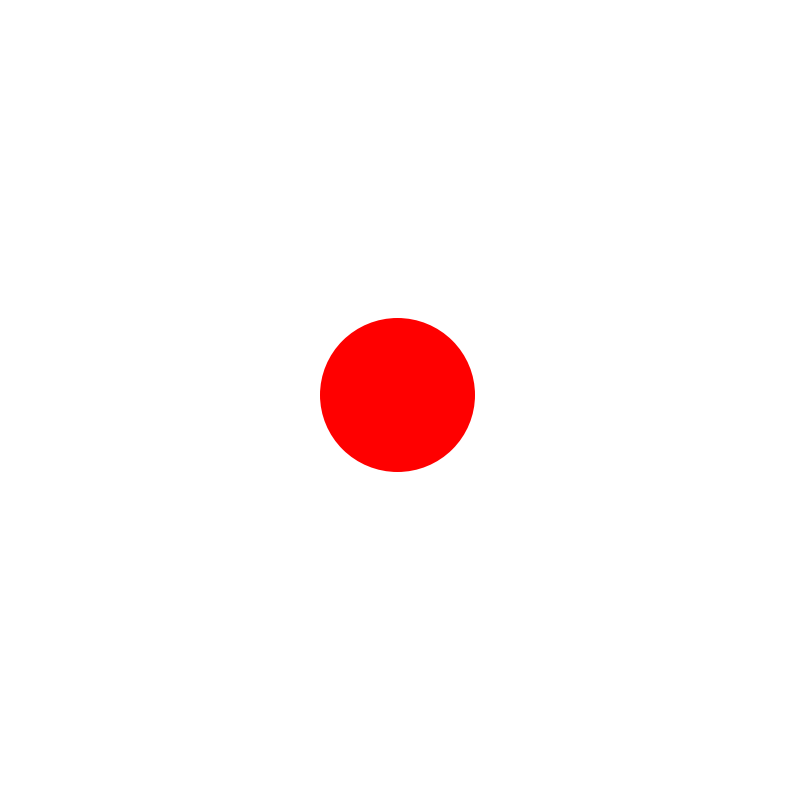

In [14]:

Writer = animation.writers['ffmpeg']
writer = Writer(fps=fps, metadata=dict(artist='Me'), bitrate=bitrate)

fig,ax  = plt.subplots(figsize=(figsize,figsize));
X = SPall

ani = mpl.animation.FuncAnimation(fig, updateAnimationHeterogeneousBySize,frames=framesToShow);#, frames=datesToPlot, repeat=True)
ani.save(animationFileName, writer=writer);
